In [2]:
# %matplotlib inline

In [2]:
! jupyter nbconvert --to script plot_figures.ipynb

[NbConvertApp] Converting notebook plot_figures.ipynb to script
[NbConvertApp] Writing 5361 bytes to plot_figures.py


In [3]:
import pickle as pk 
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy as cpy 

In [4]:
# os.listdir("../")
# for m in method_list:
#     file_name = "../"+method_to_save_dir_map[m]+method_to_save_file_map[m]+".pickle"
#     new_file_name = file_name.replace("freiburg","intel")
#     os.system("cp "+file_name+" "+new_file_name)

In [5]:
env_list = ["intel", "freiburg"] # add fhw later 
method_list = ["gng", "gng_top", "gng_top_feedback", "prm", "prm_dense", "prm_dense_hilbert"]

# roadmap_types = ["gng_top", "gng"]

method_env_to_pickle_file_map = {}

def get_file_path(env:str,method:str)->str:
    method_dir = {"gng": "gng_output/", "gng_top": "gng_top_output/", "gng_top_feedback": "gng_top_feedback_output/", "prm": "prm_output/",
                     "prm_dense": "prm_dense_output/", "prm_dense_hilbert": "prm_dense_hilbert_output/"}

    method_naming = {"gng": "gng1208_200", "gng_top": "gngtop_1208_200", "gng_top_feedback": "gngtop_feedback_1208_200",
                               "prm": "prm1208", "prm_dense": "prmdense_2500", "prm_dense_hilbert": "prmdense_hilbert4000"}
    
    file_path = f"../{method_dir[method]}{env}_{method_naming[method]}.pickle"
    print(file_path)
    return file_path

for e in env_list:
    method_env_to_pickle_file_map[e]={}
    for m in method_list:
        method_env_to_pickle_file_map[e][m] = pk.load(open(get_file_path(e,m), "rb"))

../gng_output/intel_gng1208_200.pickle
../gng_top_output/intel_gngtop_1208_200.pickle
../gng_top_feedback_output/intel_gngtop_feedback_1208_200.pickle
../prm_output/intel_prm1208.pickle
../prm_dense_output/intel_prmdense_2500.pickle
../prm_dense_hilbert_output/intel_prmdense_hilbert4000.pickle
../gng_output/freiburg_gng1208_200.pickle
../gng_top_output/freiburg_gngtop_1208_200.pickle
../gng_top_feedback_output/freiburg_gngtop_feedback_1208_200.pickle
../prm_output/freiburg_prm1208.pickle
../prm_dense_output/freiburg_prmdense_2500.pickle
../prm_dense_hilbert_output/freiburg_prmdense_hilbert4000.pickle


In [22]:
pd_df = pd.DataFrame.from_dict({"Row_id":[],"all_method_success":[],"MAP":[],"Method":[],"success":[], "node_explored":[], "path_cost":[]})

In [23]:
# method_env_to_pickle_file_map

In [24]:
def check_if_need_plotting(i,env):
    method_list = ["gng", "gng_top", "gng_top_feedback", "prm_dense", "prm_dense_hilbert"]
    bool_list= [method_env_to_pickle_file_map[env][m][0][i] for m in method_list]
    return sum(bool_list)==len(bool_list)

for env in env_list:
    for m in method_list:
        for i,data in enumerate(zip(*method_env_to_pickle_file_map[env][m])):
            s, n, p = data
            pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i,env),env,m,s,n if n is not None else "NA",p if p is not None else "NA")
#             pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i),"Dummy",m,s,n,p)        

In [25]:
pd_df.head()

,Row_id,all_method_success,MAP,Method,success,node_explored,path_cost
0,0.0,0.0,intel,gng,1.0,312,15.8515
1,1.0,1.0,intel,gng,1.0,32,2.97691
2,2.0,0.0,intel,gng,0.0,NA,NA
3,3.0,0.0,intel,gng,1.0,538,27.3121
4,4.0,0.0,intel,gng,0.0,NA,NA


In [29]:
filtered_method_list = ["gng", "gng_top", "gng_top_feedback", "prm_dense", "prm_dense_hilbert"]

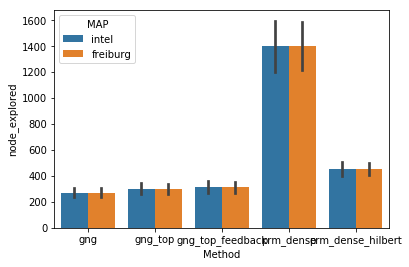

In [30]:
ax = sns.barplot(data = pd_df[(pd_df["all_method_success"]==1) & 
                              (pd_df["Method"].isin(filtered_method_list))],
                y = "node_explored",hue = "MAP" ,  x= "Method")
plt.savefig("node_explored_bar_plot.eps")

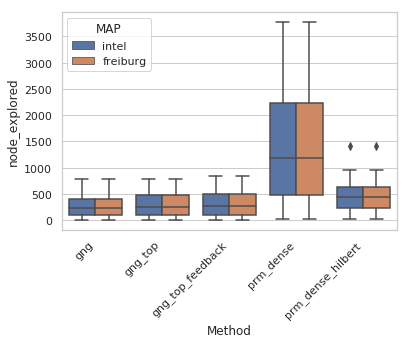

In [60]:
plot_df =cpy( pd_df[(pd_df["all_method_success"]==1) & 
                              (pd_df["Method"].isin(filtered_method_list))])
plot_df["node_explored"] = pd.to_numeric(plot_df["node_explored"])

ax = sns.boxplot(data =plot_df,
                y = "node_explored",hue = "MAP" ,  x= "Method")
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'
)
plt.savefig("node_explored_box_plot.eps")

# Success Count Plots

In [79]:
sc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"success_count":[]})
for env in env_list:
    for m in method_list:
        c_ = sum(pd_df[(pd_df["Method"]==m) & (pd_df["MAP"]==env)]["success"].tolist())
        sc_df.loc[len(sc_df)] = (env,m,c_)

In [80]:
# Normalization Code
sc_df["ground_success"] = [sc_df[(sc_df["Method"]=="prm_dense") & (sc_df["MAP"]==M)]["success_count"].tolist()[0] for M in sc_df["MAP"]]
sc_df["success metric"] = [s/g for s,g in zip(sc_df["success_count"],sc_df["ground_success"])]

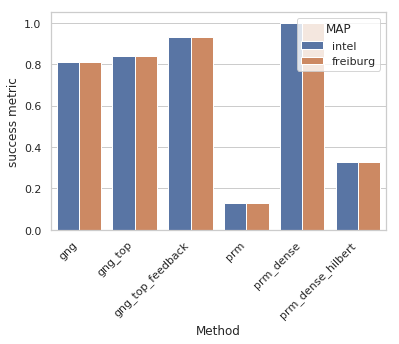

In [88]:
ax = sns.barplot(data = sc_df, y = "success metric",hue = "MAP" ,  x= "Method")

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("success_count_plots.eps")

# SPC Metric

In [83]:
spc_df = cpy(pd_df)

In [84]:
spc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"spc_metric":[]})

def calculate_spc_metric(env, method):
    pk_file_m = method_env_to_pickle_file_map[env][method]
    pk_file_dense = method_env_to_pickle_file_map[env]["prm_dense"]
    
    row_calculus_sum = 0
    for i in range(len(pk_file_m[0])):
        if pk_file_dense[0][i] and pk_file_m[0][i]:
            row_calculus_sum += pk_file_dense[2][i] / ( max(pk_file_dense[2][i],pk_file_m[2][i]) )
            
    return row_calculus_sum

for e in env_list:
    for m in method_list:
        spc_metric = calculate_spc_metric(e,m)
        spc_df.loc[len(spc_df)] = (e,m,spc_metric)
    

In [85]:
# Normalization Code
spc_df["ground_spc_metric"] = [spc_df[(spc_df["Method"]=="prm_dense") & (spc_df["MAP"]==M)]["spc_metric"].tolist()[0] for M in spc_df["MAP"]]
spc_df["SPC metric"] = [s/g for s,g in zip(spc_df["spc_metric"],spc_df["ground_spc_metric"])]    
spc_df

,MAP,Method,spc_metric,ground_spc_metric,SPC metric
0,intel,gng,302.713286,386.0,0.784231
1,intel,gng_top,309.612216,386.0,0.802104
2,intel,gng_top_feedback,344.068636,386.0,0.891370
3,intel,prm,43.511558,386.0,0.112724
4,intel,prm_dense,386.000000,386.0,1.000000
5,intel,prm_dense_hilbert,112.724515,386.0,0.292032
6,freiburg,gng,302.713286,386.0,0.784231
7,freiburg,gng_top,309.612216,386.0,0.802104
8,freiburg,gng_top_feedback,344.068636,386.0,0.891370
9,freiburg,prm,43.511558,386.0,0.112724


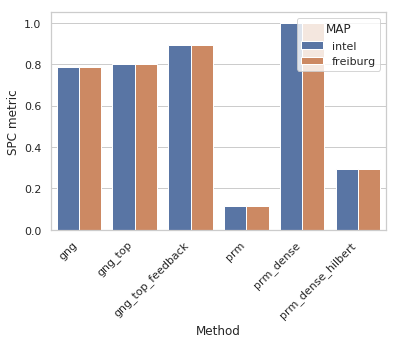

In [87]:
ax = sns.barplot(data = spc_df, y = "SPC metric", hue = "MAP" ,  x= "Method")
# plt.show()
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("spc_metric.eps")